In [1]:
import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Modelo para pocos datos

**primero se extraen muestras**

In [2]:
import os 
import shutil

# directorio con los datos originales
original_dataset_dir = 'data/dogs-vs-cats/pics'

# directorio de la muestra
try:
    base_dir = 'data/dogs-vs-cats/cats_and_dogs_small'
    os.mkdir(base_dir)
    print (base_dir+'  : Created')
except:
    print('Already created')

data/dogs-vs-cats/cats_and_dogs_small  : Created


In [3]:

try:
    # directorios de train, validacion y test
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    print (train_dir+'  : Created')

    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    print (validation_dir+'  : Created')

    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)
    print (test_dir+'  : Created')
    
    
    # directorio con imagenes de gatos, entreno
    train_cats_dir = os.path.join(train_dir, 'cats')
    os.mkdir(train_cats_dir)
    print (train_cats_dir+'  : Created')
    
    
    # directorio con imagenes de perros, entreno
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.mkdir(train_dogs_dir)
    print (train_dogs_dir+'  : Created')
    
    
    # directorio con imagenes de gatos, validacion
    validation_cats_dir = os.path.join(validation_dir, 'cats')
    os.mkdir(validation_cats_dir)
    print (validation_cats_dir+'  : Created')
    
    
    # directorio con imagenes de perros, validacion
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    os.mkdir(validation_dogs_dir)
    print (validation_dogs_dir+'  : Created')
    
    
    # directorio con imagenes de gatos, test
    test_cats_dir = os.path.join(test_dir, 'cats')
    os.mkdir(test_cats_dir)
    print (test_cats_dir+'  : Created')
    
    
    # directorio con imagenes de perros, test
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    os.mkdir(test_dogs_dir)
    print (test_dogs_dir+'  : Created')
    
    
except:
    print('Already created')

data/dogs-vs-cats/cats_and_dogs_small/train  : Created
data/dogs-vs-cats/cats_and_dogs_small/validation  : Created
data/dogs-vs-cats/cats_and_dogs_small/test  : Created
data/dogs-vs-cats/cats_and_dogs_small/train/cats  : Created
data/dogs-vs-cats/cats_and_dogs_small/train/dogs  : Created
data/dogs-vs-cats/cats_and_dogs_small/validation/cats  : Created
data/dogs-vs-cats/cats_and_dogs_small/validation/dogs  : Created
data/dogs-vs-cats/cats_and_dogs_small/test/cats  : Created
data/dogs-vs-cats/cats_and_dogs_small/test/dogs  : Created


In [4]:
# se toma una muestra de cada paquete de datos
def path_dir(animal):
    
    for i in range(2000):
        fname='{}.{}.jpg'.format(animal, i)
        
        src = os.path.join(original_dataset_dir, fname)
        
        if i<1000:
            dst = os.path.join(os.path.join(train_dir, animal+'s'), fname)
            shutil.copyfile(src, dst)
        
        elif i<1500 and i>=1000:
            dst = os.path.join(os.path.join(validation_dir, animal+'s'), fname)
            shutil.copyfile(src, dst)
            
        else:
            dst = os.path.join(os.path.join(test_dir, animal+'s'), fname)
            shutil.copyfile(src, dst)
            
    return print(fname)

**1000-500-500:train-val-test (gatos)**

In [5]:
path_dir('cat')

cat.1999.jpg


**1000-500-500:train-val-test (perros)**

In [6]:
path_dir('dog')

dog.1999.jpg


In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print()
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total validation cat images: 500
total test cat images: 500

total training dog images: 1000
total validation dog images: 500
total test dog images: 500


# Modelo (ConvNet)

In [8]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
# se configura optimizador

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [11]:
## ImageDataGenerator para leer desde directorios

from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255) # se normaliza
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [14]:
# comprobacion al generador

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Entrenando usando el generador

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=0)

print ('Done!!')

Done!!


In [16]:
# se guarda el modelo
save_path='data/dogs-vs-cats/h5_small_models'

try:
    os.mkdir(save_path)
    print (save_path+'  : Created')
except:
    print('Already created')

    
    
model.save(save_path+'/cats_and_dogs_small_1.h5')

data/dogs-vs-cats/h5_small_models  : Created


## Plots

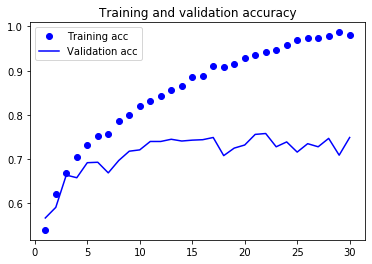

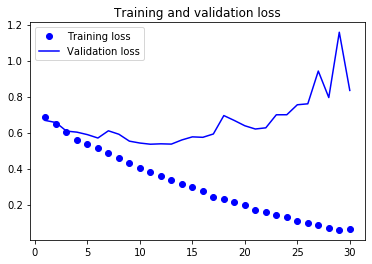

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

# acierto
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# perdida
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

## Aumento de datos con el generador

In [18]:
datagen = ImageDataGenerator(
      rotation_range=40,       # rotacion 0-180
      width_shift_range=0.2,   # rango ancho rotacion
      height_shift_range=0.2,  # rango alto rotacion
      shear_range=0.2,         # cortes de imagen aleatorios
      zoom_range=0.2,          # zoom random
      horizontal_flip=True,    # rotacion completa horizontal
      fill_mode='nearest')     # relleno de pixeles

**se representan algunas imagenes generadas**

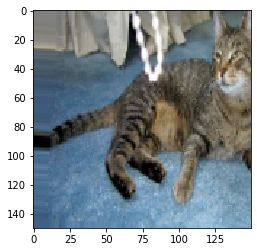

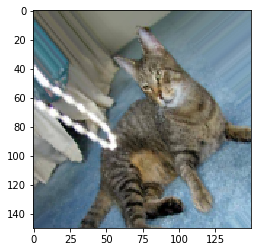

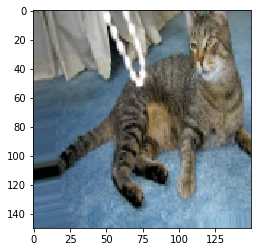

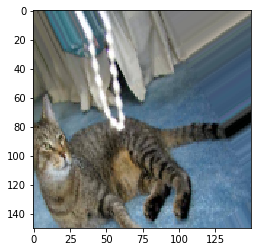

In [19]:
from keras.preprocessing import image


fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]  # imagenes

img_path = fnames[3]  # se escoge una

img = image.load_img(img_path, target_size=(150, 150)) # se carga 

x = image.img_to_array(img) # se convierte a array
x = x.reshape((1,) + x.shape) 



i=0
for batch in datagen.flow(x, batch_size=1):  # se muestran cambios random 
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show();

## Nuevo Modelo con DropOut

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

**se entrena con el nuevo generador**

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)



test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=0)


print ('Done!!')

Done!!


**se guarda el modelo**

In [25]:
model.save(save_path+'/cats_and_dogs_small_2.h5')

**plots**

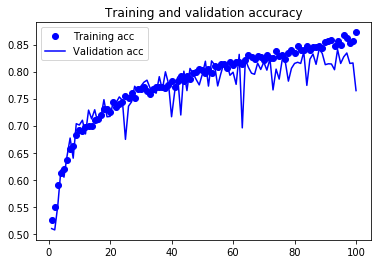

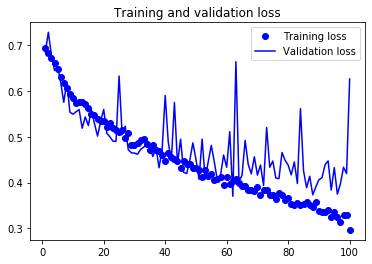

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

# acierto
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# perdida
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();